<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import os
cwd =os.chdir(r'C:\Machine_learning_datafiles\simplilearn_projects\movielens')
os.listdir(cwd)

['movies.dat', 'movie_lens.csv', 'New folder', 'ratings.dat', 'users.dat']

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
movie_data = pd.read_csv('movies.dat', sep='::', names=['MovieId','Title','Genre'])
ratings_data = pd.read_csv('ratings.dat', sep= '::', names=['UserId','MovieId','Rating','TimeStamp'])
users_data = pd.read_csv('users.dat', sep='::', names=['UserId','Gender','Age','Occupation','Zipcode'])

In [7]:
movie_data.columns, ratings_data.columns, users_data.columns

(Index(['MovieId', 'Title', 'Genre'], dtype='object'),
 Index(['UserId', 'MovieId', 'Rating', 'TimeStamp'], dtype='object'),
 Index(['UserId', 'Gender', 'Age', 'Occupation', 'Zipcode'], dtype='object'))

In [8]:
master_data= pd.merge(ratings_data,users_data, on= 'UserId', how='left')
master_data = pd.merge(master_data,movie_data, on= 'MovieId',how='left')

In [5]:
pd.set_option('max_columns',5000)

In [10]:
master_data.to_csv('movie_lens.csv', index=False)

In [68]:
%%time
master_data= pd.read_csv('movie_lens.csv')
master_data.head()

Wall time: 9.72 s


,UserId,MovieId,Rating,TimeStamp,Gender,Age,Occupation,Zipcode,Title,Genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [69]:
%%time
master_data['TimeStamp'] = master_data['TimeStamp'].apply(lambda x: pd.Timestamp(x, unit='s'))

Wall time: 5.88 s


In [8]:
master_data.shape

(1000209, 10)

In [9]:
master_data.head()

,UserId,MovieId,Rating,TimeStamp,Gender,Age,Occupation,Zipcode,Title,Genre
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


<strong> Age Distribution </strong>

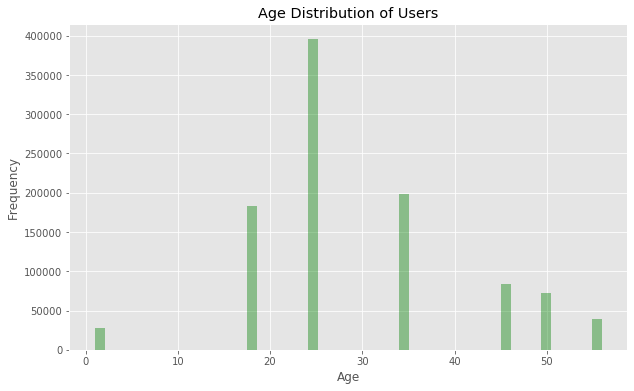

In [124]:
plt.figure(figsize=[10,6])
sns.distplot(master_data.Age,kde=False,color='g')
plt.title('Age Distribution of Users')
plt.ylabel('Frequency')
plt.xlabel('Age');
plt.savefig('user_age_distribution.jpg')

Most of the users are users between the ages of 25 and 34

<strong>Overall Rating by Users </strong>

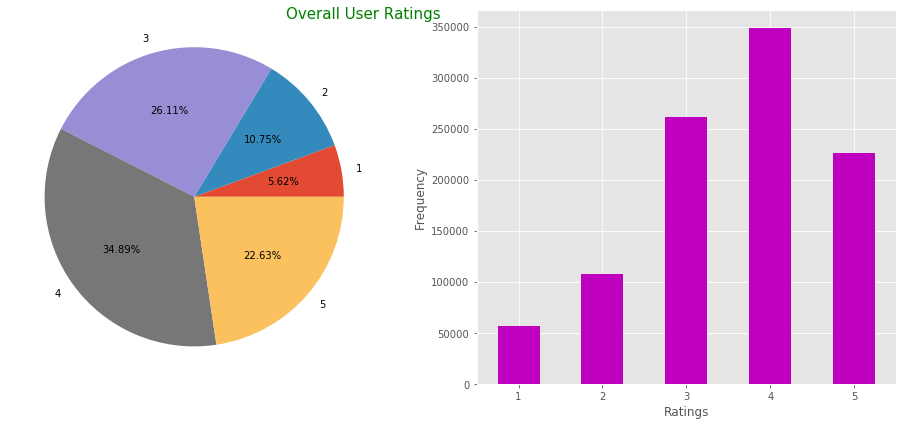

In [153]:
fig,ax= plt.subplots(1,2,figsize=[13,6])
pd.value_counts(master_data.Rating).sort_index().plot.pie(autopct='%.2f%%',labels=[1,2,3,4,5],ax=ax[0])
#ax[0].legend(title='Ratings',loc=(1.,0.29))
ax[0].set(ylabel= '')

pd.value_counts(master_data.Rating).sort_index().plot(kind='bar',color='m',rot=0,ax=ax[1])
ax[1].set(xlabel='Ratings', ylabel='Frequency')
plt.tight_layout(pad=1.2)
fig.suptitle('Overall User Ratings',ha='right',color='g',fontsize=15);
plt.savefig('Overall_User_ratings.jpeg')

From the overall ratings by users, we see that most of the users rated 4 for most of the movies, followed by 3 and then 5. The least rating is 1

<strong>User rating of movie 'Toy Story'</strong>

In [17]:
movie_data.head() #getting the movie data

,MovieId,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
user_toystory= master_data[master_data.MovieId.isin([1])] #getting Toy story data from the movie id

In [19]:
user_toystory.head()

,UserId,MovieId,Rating,TimeStamp,Gender,Age,Occupation,Zipcode,Title,Genre
40,1,1,5,2001-01-06 23:37:48,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
469,6,1,4,2000-12-31 04:30:08,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
581,8,1,4,2000-12-31 03:31:36,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
711,9,1,5,2000-12-31 01:25:52,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
837,10,1,5,2000-12-31 01:34:34,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy


In [20]:
user_toystory.Rating.value_counts().sort_index().to_frame(name='Toy Story User ratings')

,Toy Story User ratings
1,16
2,61
3,345
4,835
5,820


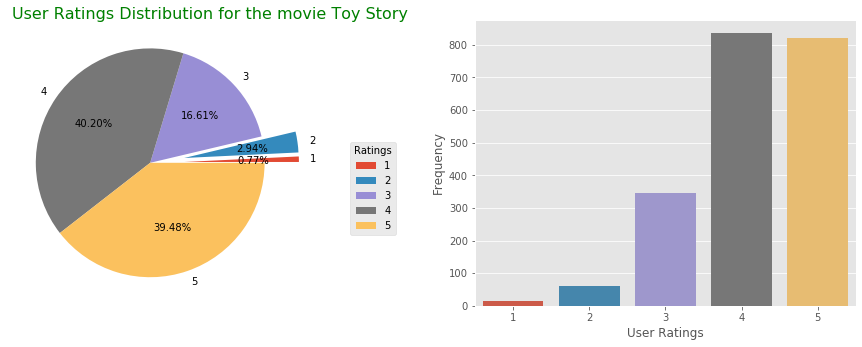

In [118]:
fig,ax= plt.subplots(1,2,figsize=[13,5])
ax[0].pie(user_toystory.Rating.value_counts().sort_index(), autopct='%.2f%%',labels=[1,2,3,4,5],explode=(0.3,0.3,0,0,0))
ax[0].legend(loc=[1.2,0.247],ncol=1,title='Ratings')

sns.countplot('Rating',data=user_toystory,ax=ax[1])
ax[1].set(xlabel='User Ratings', ylabel='Frequency')
fig.tight_layout(pad=2)

fig.suptitle('User Ratings Distribution for the movie Toy Story',ha='right',color='g',fontsize=16);
plt.savefig('user_toy_story_rating.jpeg')

<p> From the charts above we see that most of the users that rated Toy Story rated it as 4 or 5.</p>

<strong> Viewership of Toy Story by Age group</strong>

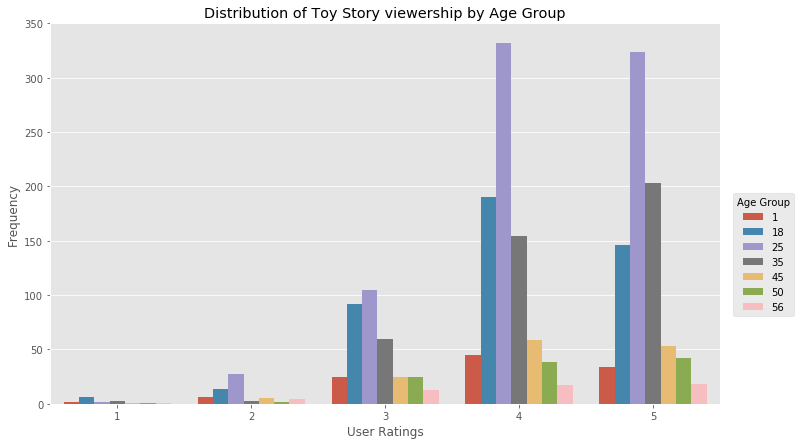

In [156]:
plt.figure(figsize=[12,7])
sns.countplot('Rating', hue='Age', data=user_toystory)
plt.title('Distribution of Toy Story viewership by Age Group')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.ylim((0,350))
plt.legend(loc=(1.02,0.23), title='Age Group');
plt.savefig('Toy_story_viewership_by_age_group.png')

<p> From the chart, we see that most of the users rated the movie 'Toy Story' as 4 or 5, with most of those ratings from users between the Ages of 25 and 34.</p>

<b> Top 25 Movies bu viewership Ratings </b>

In [23]:
top_25_movies_by_user_ratings = \
master_data.groupby('Title').agg({\
                                  'Rating':'sum'\
                                 }).sort_values(by='Rating',ascending=False).reset_index()

In [171]:
top_25_movies_by_user_ratings[:25].to_csv('top_25_movies_by_user_ratings.csv')

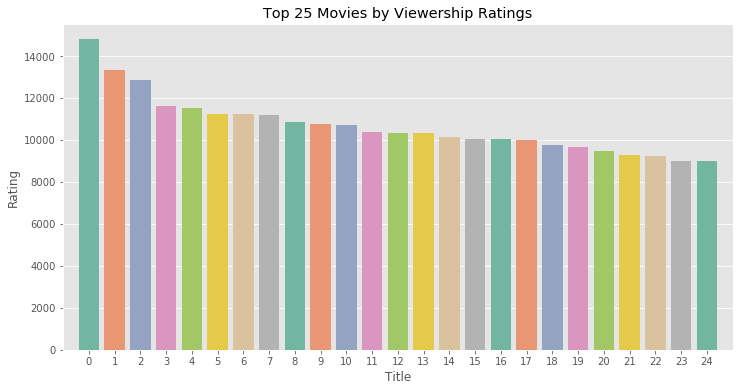

In [189]:
plt.figure(figsize=[12,6])
sns.barplot('Title','Rating',data=top_25_movies_by_user_ratings[:25],palette='Set2')
plt.xticks(np.arange(25),range(25))
plt.title('Top 25 Movies by Viewership Ratings')
plt.xlim((-1,25));
plt.savefig('Top_25_Movies_by_Viewership_Ratings.jpg')

<strong>Movie rating bu userid= 2696</strong>

In [26]:
rating_by_user_2696 = master_data[master_data.UserId == 2696][['UserId','Rating']].reset_index(drop=True)

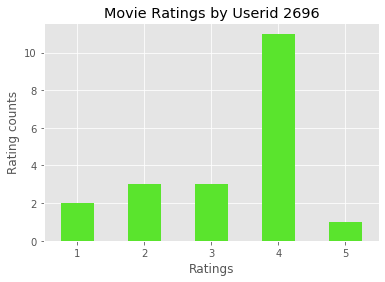

In [190]:
rating_by_user_2696.Rating.value_counts().sort_index().plot.bar(rot=0,color='#5ae42d')
plt.title('Movie Ratings by Userid 2696')
plt.xlabel('Ratings')
plt.ylabel('Rating counts')
plt.savefig('Movie_Ratings_by_Userid_2696.jpg');

<h4>Feature Engineering</h4>

unique Genres

In [71]:
master_data['Genre'] = master_data.Genre.apply(lambda x: x.split('|'))

In [72]:
%%time
genre_list= []
for genres in master_data.Genre.values:
    for genre in genres:
        genre_list.append(genre)

Wall time: 608 ms


In [73]:
unique_genre = set(genre_list)

In [74]:
print('The unique Genres are: [{}]'.format(unique_genre))

The unique Genres are: [{"Children's", 'Romance', 'Action', 'Adventure', 'Sci-Fi', 'Western', 'Film-Noir', 'Documentary', 'Comedy', 'Fantasy', 'War', 'Crime', 'Horror', 'Thriller', 'Musical', 'Drama', 'Mystery', 'Animation'}]


<b>One hot encoding of unique genres</b>

In [81]:
%%time
for genre in unique_genre:
    master_data[genre] = master_data.Genre.apply(lambda x: 1 if genre in x else 0)

Wall time: 9.66 s


In [82]:
master_data.head(2)

,UserId,MovieId,Rating,TimeStamp,Gender,Age,Occupation,Zipcode,Title,Genre,Children's,Romance,Action,Adventure,Sci-Fi,Western,Film-Noir,Documentary,Comedy,Fantasy,War,Crime,Horror,Thriller,Musical,Drama,Mystery,Animation
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),"[Animation, Children's, Musical]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


<h5>Counting Genres using Counter and defaultdict </h5>

In [17]:
from collections import Counter, defaultdict

In [18]:
genre_count = Counter(genre_list)

In [19]:
genre_count.most_common(5) #most common genre

[('Comedy', 356580),
 ('Drama', 354529),
 ('Action', 257457),
 ('Thriller', 189680),
 ('Sci-Fi', 157294)]

In [20]:
genre_dict = defaultdict(int)
for genre in genre_list:
    if genre in genre_dict:
        genre_dict[genre] +=1
    else:
        genre_dict[genre] = 1

In [21]:
genre_dict

defaultdict(int,
            {'Drama': 354529,
             'Animation': 43293,
             "Children's": 72186,
             'Musical': 41533,
             'Romance': 147523,
             'Comedy': 356580,
             'Action': 257457,
             'Adventure': 133953,
             'Fantasy': 36301,
             'Sci-Fi': 157294,
             'War': 68527,
             'Thriller': 189680,
             'Crime': 79541,
             'Mystery': 40178,
             'Western': 20683,
             'Horror': 76386,
             'Film-Noir': 18261,
             'Documentary': 7910})

In [22]:
genres = pd.Series(np.array(genre_list)).to_frame(name='Genres')

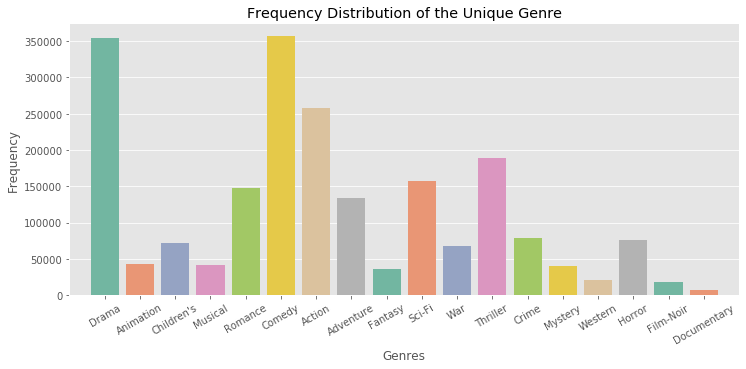

In [23]:
plt.figure(figsize=[12,5])
sns.countplot('Genres',data=genres,palette='Set2')
plt.xticks(rotation=30)
plt.xlim(-1,18)
plt.title('Frequency Distribution of the Unique Genre')
plt.ylabel('Frequency');
plt.savefig('Unique_genre_Counts.png')

In [24]:
master_data.shape

(1000209, 28)

<b>Machine Learning</b>

In [42]:
master_data.columns

Index(['UserId', 'MovieId', 'Rating', 'TimeStamp', 'Gender', 'Age',
       'Occupation', 'Zipcode', 'Title', 'Genre', 'Crime', 'Western',
       'Film-Noir', 'Fantasy', 'Adventure', 'Sci-Fi', 'Romance', 'Animation',
       'Children's', 'Musical', 'Comedy', 'Thriller', 'Horror', 'Documentary',
       'War', 'Mystery', 'Action', 'Drama'],
      dtype='object')

In [67]:
master_data.head(2)

,UserId,MovieId,Rating,TimeStamp,Gender,Age,Occupation,Zipcode,Title,Genre,Children's,Romance,Action,Adventure,Sci-Fi,Western,Film-Noir,Documentary,Comedy,Fantasy,War,Crime,Horror,Thriller,Musical,Drama,Mystery,Animation,Rating_mean_by_age,Rating_mean_by_movieid,Rating_mean_per_movie_user,Rating_mean_per_movie_by_age,rating_greater_than_mean_age_rating,rating_greater_than_mean_movie_rating_per_user,rating_greater_than_mean_movie_rating,rating_greater_than_mean_movie_rating_by_age,Rating_mean_by_age,Rating_mean_by_movieid,Rating_mean_per_movie_user,Rating_mean_per_movie_by_age
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,5,4.222222,1,1,1,1,3.54952,4.390725,5,4.222222
1,19,1193,5,2001-02-21 04:48:56,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),[Drama],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,5,4.222222,1,1,1,1,3.54952,4.390725,5,4.222222


<b>FEATURE ENGINERRING</b>

WE WILL BE GENERATING NEW FEATURES FROM THE AVAILABLE PREDICTORS
1. THE MEAN USER RATINGS FOR A PARTICULAR MOVIE
2. THE MEAN RATING BY AN AGE GROUP
3. THE MEAN RATING FOR A MOVIE BY A PARTICULAR AGE GROUP

In [85]:
mean_user_rating_per_movie = master_data.groupby('MovieId')[['Rating']].mean()
mean_rating_by_age_group = master_data.groupby('Age')[['Rating']].mean()
mean_rating_per_movie_per_age = master_data.groupby(['MovieId','Age'])[['Rating']].mean()

In [86]:
master_data = pd.merge(master_data,mean_rating_by_age_group,on='Age',suffixes=['','_mean_by_age'])
master_data = pd.merge(master_data,mean_rating_per_movie, on='MovieId',suffixes=['','_mean_by_movieid'])
master_data = pd.merge(master_data,mean_rating_per_movie_per_age, on=['Age','MovieId'],suffixes=['','_mean_per_movie_by_age'])

For those new features generated, we will be binning them by giving a value of 1 if the rating given by a user for a particular movie is greater than any of those features and a value of 0 if rating isn't

In [87]:
master_data['rating_greater_than_mean_age_rating']= \
(master_data.Rating >= master_data.Rating_mean_by_age).astype(int)

master_data['rating_greater_than_mean_movie_rating']=\
(master_data.Rating >= master_data.Rating_mean_by_movieid).astype(int)

master_data['rating_greater_than_mean_movie_rating_by_age']=\
(master_data.Rating >= master_data.Rating_mean_per_movie_by_age).astype(int)

In [88]:
cols_to_drop = ['UserId','MovieId','TimeStamp','Gender','Zipcode','Title','Genre','Occupation']

In [89]:
age_bins = {1:1,18:2,25:3,35:4,45:5,50:6,56:7}
master_data['Age'] = master_data.Age.map(age_bins)

In [90]:
master_data_copy = master_data.copy()

In [91]:
master_data_copy.drop(cols_to_drop,axis=1,inplace=True)

In [92]:
master_data_copy.head()

,Rating,Age,Children's,Romance,Action,Adventure,Sci-Fi,Western,Film-Noir,Documentary,Comedy,Fantasy,War,Crime,Horror,Thriller,Musical,Drama,Mystery,Animation,Rating_mean_by_age,Rating_mean_by_movieid,Rating_mean_per_movie_by_age,rating_greater_than_mean_age_rating,rating_greater_than_mean_movie_rating,rating_greater_than_mean_movie_rating_by_age
0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,4.222222,1,1,1
1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,4.222222,1,1,1
2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,4.222222,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,4.222222,1,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.54952,4.390725,4.222222,1,0,0


In [93]:
corr= master_data_copy.corr() #correlation
#creating mask
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [94]:
corr

,Rating,Age,Children's,Romance,Action,Adventure,Sci-Fi,Western,Film-Noir,Documentary,Comedy,Fantasy,War,Crime,Horror,Thriller,Musical,Drama,Mystery,Animation,Rating_mean_by_age,Rating_mean_by_movieid,Rating_mean_per_movie_by_age,rating_greater_than_mean_age_rating,rating_greater_than_mean_movie_rating,rating_greater_than_mean_movie_rating_by_age
Rating,1.000000,0.059047,-0.039829,0.009644,-0.047633,-0.036718,-0.044487,0.007311,0.060259,0.028098,-0.039622,-0.023312,0.075688,0.033446,-0.094353,-0.004806,0.015643,0.122561,0.015848,0.019670,0.061349,0.488549,0.514535,0.845576,0.717000,0.700598
Age,0.059047,1.000000,-0.050375,0.017420,-0.032723,-0.017328,-0.012540,0.038833,0.034327,0.004025,-0.043938,-0.024406,0.039283,-0.008596,-0.025664,-0.014902,0.006373,0.064693,0.024974,-0.045272,0.962472,0.105987,0.114758,0.046186,0.005642,0.001403
Children's,-0.039829,-0.050375,1.000000,-0.084550,-0.141314,0.098283,-0.038844,-0.031269,-0.038033,-0.024901,0.058711,0.263280,-0.066539,-0.081977,-0.077099,-0.132642,0.312567,-0.135707,-0.052786,0.576204,-0.036208,-0.081524,-0.077407,-0.033144,0.014023,0.006551
Romance,0.009644,0.017420,-0.084550,1.000000,-0.067830,-0.024389,-0.133752,-0.044650,-0.047351,-0.037137,0.112843,-0.014822,0.053347,-0.073320,-0.099434,-0.081384,0.023506,0.023552,-0.040162,-0.054540,0.015512,0.019740,0.018743,0.003705,0.000037,-0.002579
Action,-0.047633,-0.032723,-0.141314,-0.067830,1.000000,0.374961,0.319117,0.022242,-0.080288,-0.052565,-0.268092,0.014551,0.135872,0.088519,-0.042733,0.202756,-0.100432,-0.202415,-0.054084,-0.110294,-0.035127,-0.097499,-0.092575,-0.043084,-0.021280,-0.012122
Adventure,-0.036718,-0.017328,0.098283,-0.024389,0.374961,1.000000,0.284190,-0.011964,-0.014178,-0.035109,-0.124960,0.227046,0.016647,-0.045924,-0.057256,-0.038423,-0.022327,-0.194570,-0.043503,0.004732,-0.015667,-0.075157,-0.071361,-0.036188,-0.008017,-0.002431
Sci-Fi,-0.044487,-0.012540,-0.038844,-0.133752,0.319117,0.284190,1.000000,-0.010935,-0.004056,-0.038568,-0.187079,0.121843,0.039314,-0.083730,0.056505,0.102546,-0.068012,-0.212747,-0.028273,-0.055526,-0.013394,-0.091059,-0.086460,-0.040404,-0.007995,-0.005284
Western,0.007311,0.038833,-0.031269,-0.044650,0.022242,-0.011964,-0.010935,1.000000,-0.019816,-0.012974,0.007927,-0.028199,-0.019803,-0.042711,-0.041784,-0.058897,-0.030245,-0.045945,-0.029727,-0.030908,0.038597,0.014965,0.014209,0.005898,-0.007952,-0.006330
Film-Noir,0.060259,0.034327,-0.038033,-0.047351,-0.080288,-0.014178,-0.004056,-0.019816,1.000000,-0.012175,-0.101425,-0.026464,-0.036984,0.136237,-0.039157,0.115231,-0.028384,-0.067297,0.215354,0.037013,0.034110,0.123343,0.117113,0.051954,-0.004564,-0.004623
Documentary,0.028098,0.004025,-0.024901,-0.037137,-0.052565,-0.035109,-0.038568,-0.012974,-0.012175,1.000000,-0.040697,-0.017326,-0.016082,-0.026243,-0.025673,-0.043191,-0.007155,-0.062194,-0.018265,-0.018991,0.002029,0.057513,0.054608,0.026635,-0.007279,0.000638


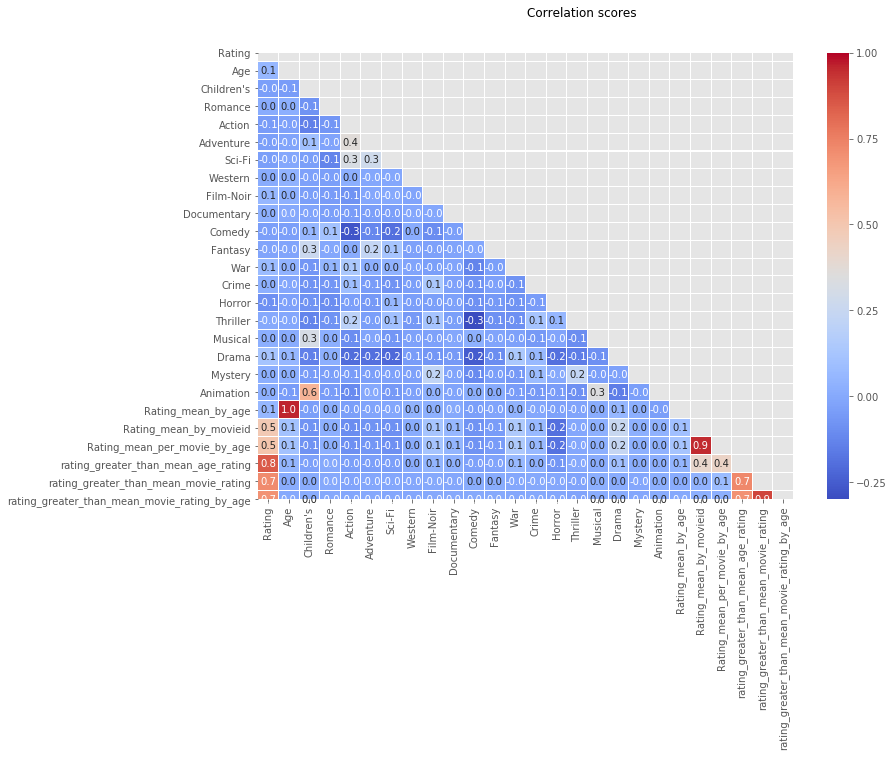

In [96]:
f,ax =plt.subplots(figsize=[12,8])
sns.heatmap(corr.round(2),linewidths=0.05,mask=mask,cmap="coolwarm",ax=ax,annot=True,fmt='.1f')
f.subplots_adjust(top=0.9)
t= f.suptitle('Correlation scores', fontsize=12);

In [97]:
from custom_metrics import vif

In [102]:
vif.vif_calc(master_data_copy,['Rating','Age','Rating_mean_by_movieid'])

Children's  vif=  1.81
Romance  vif=  1.07
Action  vif=  1.57
Adventure  vif=  1.34
Sci-Fi  vif=  1.27
Western  vif=  1.03
Film-Noir  vif=  1.14
Documentary  vif=  1.05
Comedy  vif=  1.58
Fantasy  vif=  1.19
War  vif=  1.11
Crime  vif=  1.09
Horror  vif=  1.19
Thriller  vif=  1.35
Musical  vif=  1.19
Drama  vif=  1.67
Mystery  vif=  1.12
Animation  vif=  1.67
Rating_mean_by_age  vif=  1.02
Rating_mean_per_movie_by_age  vif=  1.67
rating_greater_than_mean_age_rating  vif=  3.21
rating_greater_than_mean_movie_rating  vif=  6.01
rating_greater_than_mean_movie_rating_by_age  vif=  5.83


For this purpose I will be dropping collinear variables with correlation coefficients equal to or above 0.85 (threshold).

From the correlation matrix, there is a very strong correlation between Age and the mean rating by age group (~0.92), so we will be dropping the age column.

In [187]:
X= master_data_copy.drop('Rating',axis=1)
y = master_data_copy.Rating

In [174]:
X = X.drop(['Age','Rating_mean_by_movieid'],1)

In [106]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,ShuffleSplit
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.15, random_state=1992)

In [202]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=124)

In [203]:
X_train.shape, X_test.shape, X_val.shape

((765159, 25), (150032, 25), (85018, 25))

In [204]:
predictors= X_train.columns.tolist()

In [205]:
scaler = StandardScaler()

In [193]:
from sklearn.pipeline import Pipeline

<b>Linear Regression </b>

In [206]:
lin_model= LinearRegression()

In [207]:
pipeline= Pipeline([('scaler',scaler),('model',lin_model)])

In [208]:
fit= pipeline.fit(X_train,y_train)

In [209]:
y_pred= pipeline.predict(X_val)

In [210]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [211]:
r2_train = r2_score(y_train, pipeline.predict(X_train))
r2_train

0.8076161458823835

In [212]:
r2_val = r2_score(y_val,y_pred)
r2_val

0.8067907476886027

In [213]:
train_mse = mean_squared_error(y_train, pipeline.predict(X_train))
train_mse

0.2399340828307028

In [214]:
val_mse = mean_squared_error(y_val, y_pred)
val_mse

0.24192933021228297

In [215]:
train_mae = mean_absolute_error(y_train, pipeline.predict(X_train))
train_mae

0.3929323058790929

In [216]:
val_mae = mean_absolute_error(y_val, y_pred)
val_mae

0.3949629434550447

In [124]:
coef, pred = zip(*zip(lin_model.coef_.ravel(),predictors))

<b>Ridge</b>

In [217]:
ridge = Ridge(random_state=423)
ridge_pl = Pipeline([('scaler',scaler),('ridge',ridge)])

In [218]:
fit= ridge_pl.fit(X_train,y_train)

In [219]:
ridge_pl.score(X_val,y_val)

0.8067907442205556

In [220]:
ridge_pl.score(X_train,y_train)

0.8076161458810671

In [221]:
train_mse = mean_squared_error(y_train, ridge_pl.predict(X_train))
train_mse

0.23993408283234458

In [222]:
val_mse = mean_squared_error(y_val, y_pred)
val_mse

0.24192933021228297

In [223]:
kfold = KFold(n_splits=5,shuffle=True,random_state=3)

In [224]:
ridge_gcv= GridSearchCV(ridge_pl, 
                        param_grid={
                            'ridge__alpha':[0.1,0.5,1,3,5,7.5,10,15,20,25,100]
                        },scoring= 'neg_mean_squared_error', cv=10)

ridge_gcv.fit(X_train,y_train)

-ridge_gcv.best_score_, ridge_gcv.best_params_

(0.23995052140731943, {'ridge__alpha': 20})

In [225]:
ridge_gcv.cv_results_['mean_test_score']

array([-0.23995052, -0.23995052, -0.23995052, -0.23995052, -0.23995052,
       -0.23995052, -0.23995052, -0.23995052, -0.23995052, -0.23995052,
       -0.23995053])

In [226]:
ridge_gcv.cv_results_['std_test_score']

array([0.00116278, 0.00116278, 0.00116278, 0.00116278, 0.00116278,
       0.00116278, 0.00116278, 0.00116278, 0.00116278, 0.00116279,
       0.00116279])

Ridge regression seems to be underfitting the model.

In [133]:
from sklearn.model_selection import learning_curve,validation_curve

In [143]:
train_sizes, train_scores, test_scores = learning_curve(ridge_pl, X, y, cv=kfold, scoring='r2',\
                                                       random_state=43, shuffle=True)

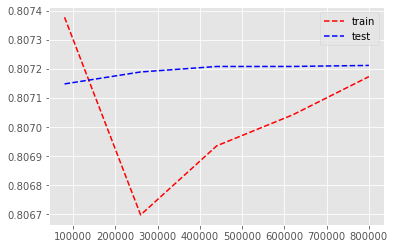

In [144]:
plt.plot(train_sizes, np.median(train_scores,1), 'r--', label='train')
plt.plot(train_sizes, np.median(test_scores,1), 'b--', label='test')
plt.legend();

concatenating the X_train and X_val datasets, fitting them and predicting on the X_test

In [227]:
X_train_ = pd.concat([X_train, X_val])
y_train_ = pd.concat([y_train, y_val])

In [228]:
ridge_model= ridge_gcv.best_estimator_.fit(X_train_, y_train_)

In [229]:
r2_score= ridge_model.score(X_test, y_test)
r2_score

0.8073494787138824

In [230]:
mse = mean_squared_error(y_test, ridge_model.predict(X_test))
mse

0.24068463836339005

Cross validation

In [231]:
ssplit = ShuffleSplit(n_splits=10, test_size=0.35, random_state=2991)

In [232]:
cvs = cross_val_score(ridge_gcv.best_estimator_, X, y, scoring='r2', cv=ssplit)
print(cvs)
cvs.mean()

[0.80759204 0.80792614 0.80730919 0.80822027 0.80785624 0.8080304
 0.80772101 0.80774523 0.80781624 0.80735571]


0.8077572473516218

In [233]:
coef, pred = zip(*zip(ridge.coef_.ravel(),predictors))

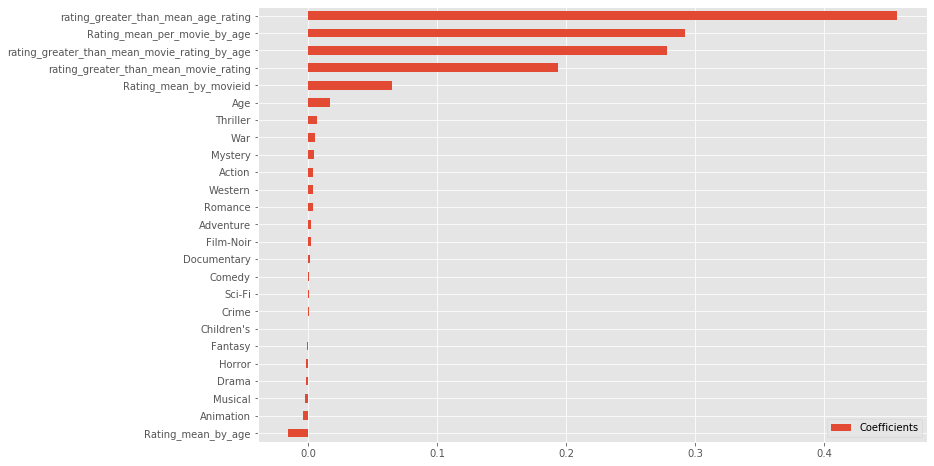

In [234]:
pd.DataFrame(coef,index=pred,columns=['Coefficients']).sort_values(by='Coefficients').plot.barh(figsize=[12,8]);

<p> From the cross validation technique we see that our model is in line and seems to be underfitting  </p>

<b> Non Parametric model </b>

In [235]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

In [236]:
tree= DecisionTreeRegressor(random_state=56)

In [237]:
fit = tree.fit(X_train, y_train)

In [238]:
tree.score(X_val, y_val)

0.8323533877963364

In [239]:
coef, pred = zip(*zip(tree.feature_importances_,predictors))

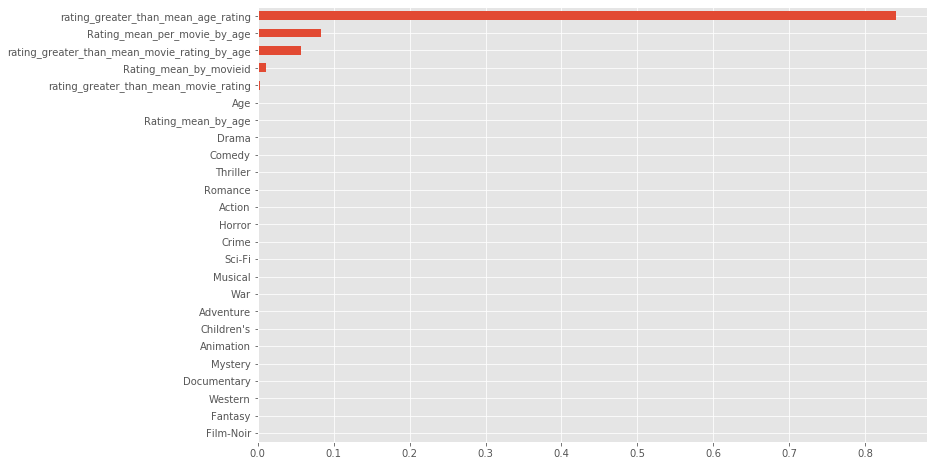

In [240]:
pd.Series(coef,index=pred).sort_values().plot.barh(figsize=[12,8]);

In [241]:
tree.score(X_train, y_train)

0.8511215831659009

In [242]:
train_mse = mean_squared_error(y_train, tree.predict(X_train))
train_mse

0.1856756979956234

In [243]:
val_mse = mean_squared_error(y_val, tree.predict(X_val))
val_mse

0.20992075750814423

This model is overfitting so we will use grid search to find the optimal values.

In [244]:
tree_gcv = GridSearchCV(tree, 
                        param_grid={
                            'max_depth': [6,7,8,9,10,11,12,13,14]
                        }, scoring='r2', cv=kfold)

tree_gcv.fit(X_train, y_train)

tree_gcv.best_score_, tree_gcv.best_params_

(0.8396761102990712, {'max_depth': 11})

In [245]:
tree_gcv.best_estimator_.score(X_val,y_val)

0.8397475463005599

In [246]:
val_mse = mean_squared_error(y_val, tree_gcv.best_estimator_.predict(X_val))
val_mse

0.20066207143069312

In [247]:
tree_gcv.best_estimator_.score(X_train,y_train)

0.8406039778667973

In [248]:
train_mse = mean_squared_error(y_train, tree_gcv.best_estimator_.predict(X_train))
train_mse

0.19879286935384444

<b> The model seems not to be overfitting anymore </b>

In [249]:
tree_model = tree_gcv.best_estimator_.fit(X_train_, y_train_)#0.8642376712418565

In [250]:
tree_model.score(X_test,y_test)

0.8394030828214183

In [251]:
features, importance = zip(*zip(predictors,tree.feature_importances_ ))

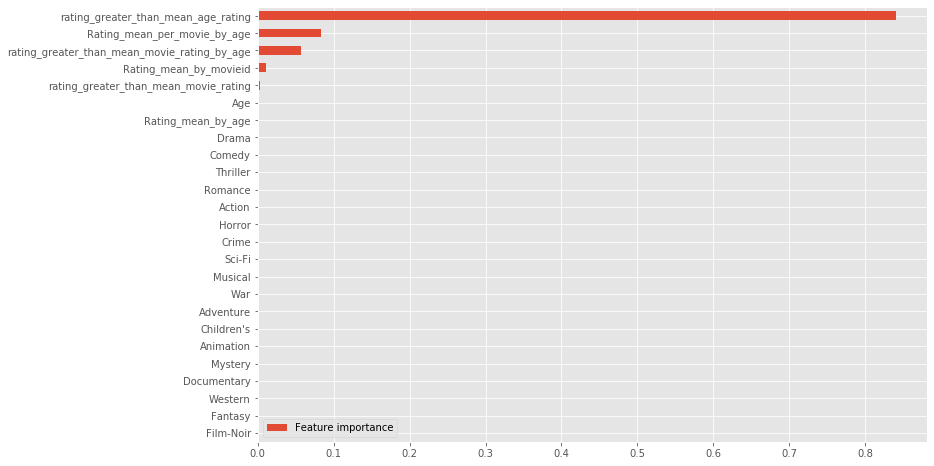

In [252]:
pd.DataFrame(importance, index= features, columns=['Feature importance']).sort_values(by='Feature importance'\
                                                                                     ).plot.barh(figsize=[12,8]);

In [253]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

[25/25] features ████████████████████ Time elapsed: 5 seconds

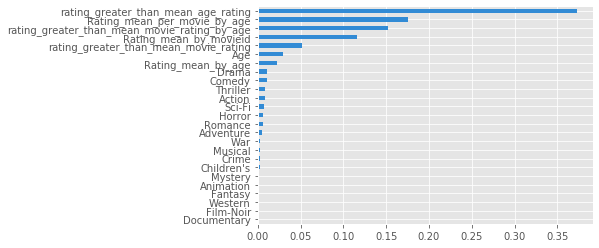

In [254]:
interpreter = Interpretation(X_val, feature_names=predictors)
model = InMemoryModel(tree.predict, examples=X_train)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=False)

In [255]:
from eli5.sklearn import PermutationImportance
import eli5

In [256]:
perm = PermutationImportance(tree, scoring='neg_mean_squared_error',random_state=2).fit(X_val,y_val)
eli5.show_weights(perm,feature_names=predictors)

Weight,Feature
1.1533 ± 0.0073,rating_greater_than_mean_age_rating
0.2631 ± 0.0015,Rating_mean_per_movie_by_age
0.2504 ± 0.0018,rating_greater_than_mean_movie_rating_by_age
0.1192 ± 0.0030,Rating_mean_by_movieid
0.0506 ± 0.0012,rating_greater_than_mean_movie_rating
0.0137 ± 0.0005,Age
0.0118 ± 0.0011,Rating_mean_by_age
0.0059 ± 0.0002,Comedy
0.0059 ± 0.0006,Drama
0.0049 ± 0.0004,Action


In [257]:
cvs= cross_val_score(tree_gcv.best_estimator_, X, y, scoring='r2', cv=ssplit)
print(cvs)
cvs.mean()

[0.83941521 0.84008844 0.83942839 0.840675   0.83953351 0.84007069
 0.83993641 0.83984111 0.83947999 0.83953986]


0.8398008593408866

In [259]:
extratree = ExtraTreeRegressor(random_state=426)

In [260]:
fit= extratree.fit(X_train, y_train)

In [261]:
extratree.score(X_val, y_val)

0.8325312682051393

In [262]:
extratree.score(X_train, y_train)

0.8511215831659009

In [112]:
extratree_gcv = GridSearchCV(extratree, 
                        param_grid={
                            'max_depth': [15]
                        }, scoring='r2', cv=kfold)

extratree_gcv.fit(X_train, y_train)

extratree_gcv.best_score_, extratree_gcv.best_params_

(0.8576987834169556, {'max_depth': 15})

In [113]:
extratree_gcv.cv_results_['mean_test_score']

array([0.85769878])

In [114]:
extratree_gcv.best_estimator_.score(X_val,y_val)

SyntaxError: invalid syntax (<ipython-input-114-a75fce5dadbd>, line 1)

In [ ]:
extratree_gcv.best_estimator_.score(X_train,y_train)

In [ ]:
val_mse = mean_squared_error(y_val, extratree_gcv.best_estimator_.predict(X_val))
val_mse

In [ ]:
train_mse = mean_squared_error(y_train, tree_gcv.best_estimator_.predict(X_train))
train_mse

In [ ]:
extratree_gcv.best_estimator_.score(X_test,y_test) #predicting the X_test

Cross validation

In [ ]:
cvs= cross_val_score(extratree_gcv.best_estimator_, X_train_, y_train_, scoring='r2', cv=ssplit)
print(cvs)
cvs.mean()

In [266]:
from sklearn.ensemble import VotingRegressor

In [267]:
vreg = VotingRegressor([('ridge',ridge),('tree',tree),('extratree',extratree)])

In [268]:
fit=vreg.fit(X_train, y_train)

In [269]:
vreg.score(X_train,y_train)

0.9797091511496802

In [275]:
vreg.score(X_val,y_val)

0.8314070744972387

In [276]:
from sklearn.ensemble import RandomForestRegressor

In [281]:
rfc = RandomForestRegressor()

In [282]:
fit= rfc.fit(X_train, y_train)

In [283]:
rfc.score(X_train, y_train)

0.9731069978140267

In [284]:
rfc.score(X_val, y_val)

0.8489313896545123

In [285]:
pred, imp = zip(*zip(predictors, rfc.feature_importances_))

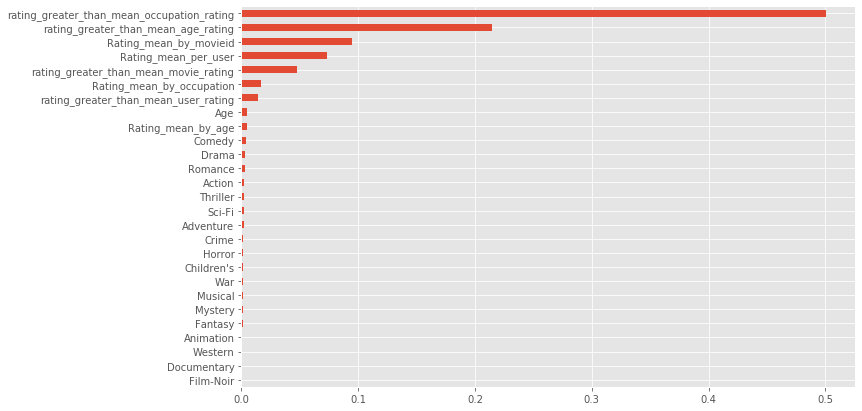

In [286]:
pd.Series(imp, index=pred).sort_values().plot.barh(figsize=[11,7]);

In [287]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [288]:
xgb = XGBRegressor(random_state=53, max_depth=5)
fit= xgb.fit(X_train, y_train)

[21:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [289]:
xgb.score(X_train, y_train)

0.8642419228956066

In [290]:
xgb.score(X_val, y_val)

0.8652332097688313

In [291]:
pred, imp = zip(*zip(predictors, xgb.feature_importances_))

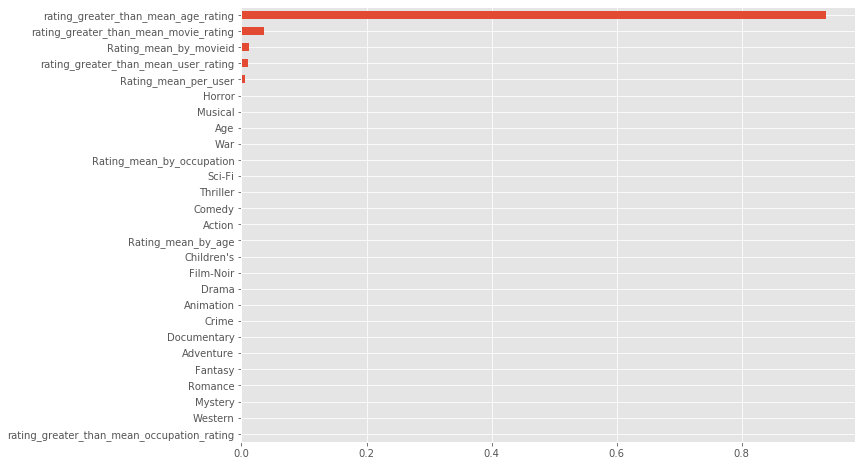

In [292]:
pd.Series(imp, index=pred).sort_values().plot.barh(figsize=[11,8])

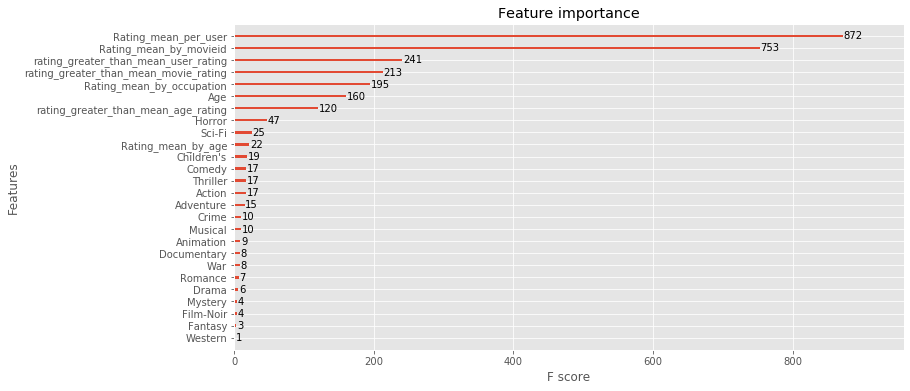

In [293]:
fig,ax =plt.subplots(figsize=[12,6])
plot_importance(xgb,ax=ax,)